In [146]:
import os
import random as rn
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [7]:
# load data
raw_data = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')
raw_data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## data preprocess


In this project, we will focus on 5 features relevant to the price: 
- age
- gender
- annual salary
- credit card debt
- net worth. 

In addition, the response is column "car purchase amount"

In [13]:
# remove useless columns for prediction
raw_data.drop(columns = ['customer name', 'customer e-mail', 'country'], inplace = True)
raw_data.describe()[1:]

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
mean,0.492000,46.241674,62127.239608,9607.645049,431475.713625,44105.799218
std,0.500437,7.978862,11703.378228,3489.187973,173536.756340,10959.051567
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,0.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## seperate raw data into X and y

In [14]:
X_raw = raw_data.drop (["car purchase amount"], axis = 1)
X_raw.head()

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [15]:
y_raw = raw_data['car purchase amount']
y_raw.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

## Visualize the raw data

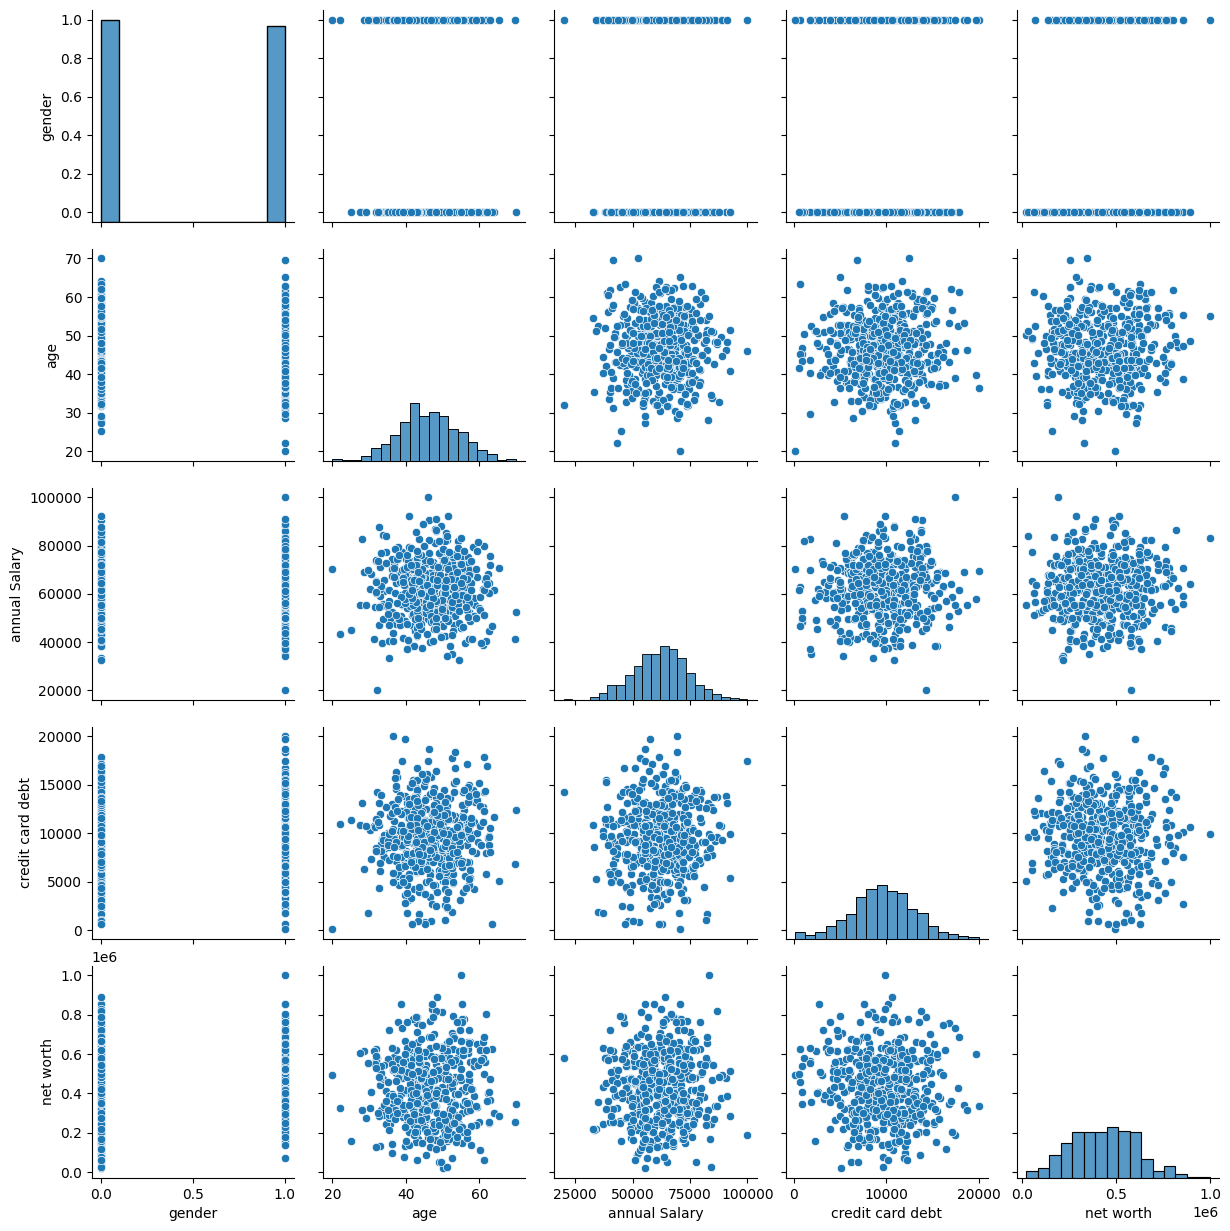

In [16]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(X_raw)

## Normalization

Because Min/Max values are in different ranges among columns, it is required to rescale the data

In [128]:
Scaler = MinMaxScaler()

X = Scaler.fit_transform(X_raw)
y = Scaler.fit_transform(y_raw.values.reshape(-1,1)) # reshaping y values to be column vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# all_data_sets = [X_train, X_test, y_train, y_test]
all_data_sets = [X, y]

## Pre-screening

Epoch 1/100
12/12 [==============================] - 1s 13ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - val_loss: 0.1153 - val_mean_absolute_error: 0.1153
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - val_loss: 0.1124 - val_mean_absolute_error: 0.1124
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - val_loss: 0.1085 - val_mean_absolute_error: 0.1085
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - val_loss: 0.1054 - val_mean_absolute_error: 0.1054
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - val_loss: 0.1020 - val_mean_absolute_error: 0.1020
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - val_loss: 0.0985 - val_mean_absolute_error: 0.0985
Epoch 7/100
12/12 [==

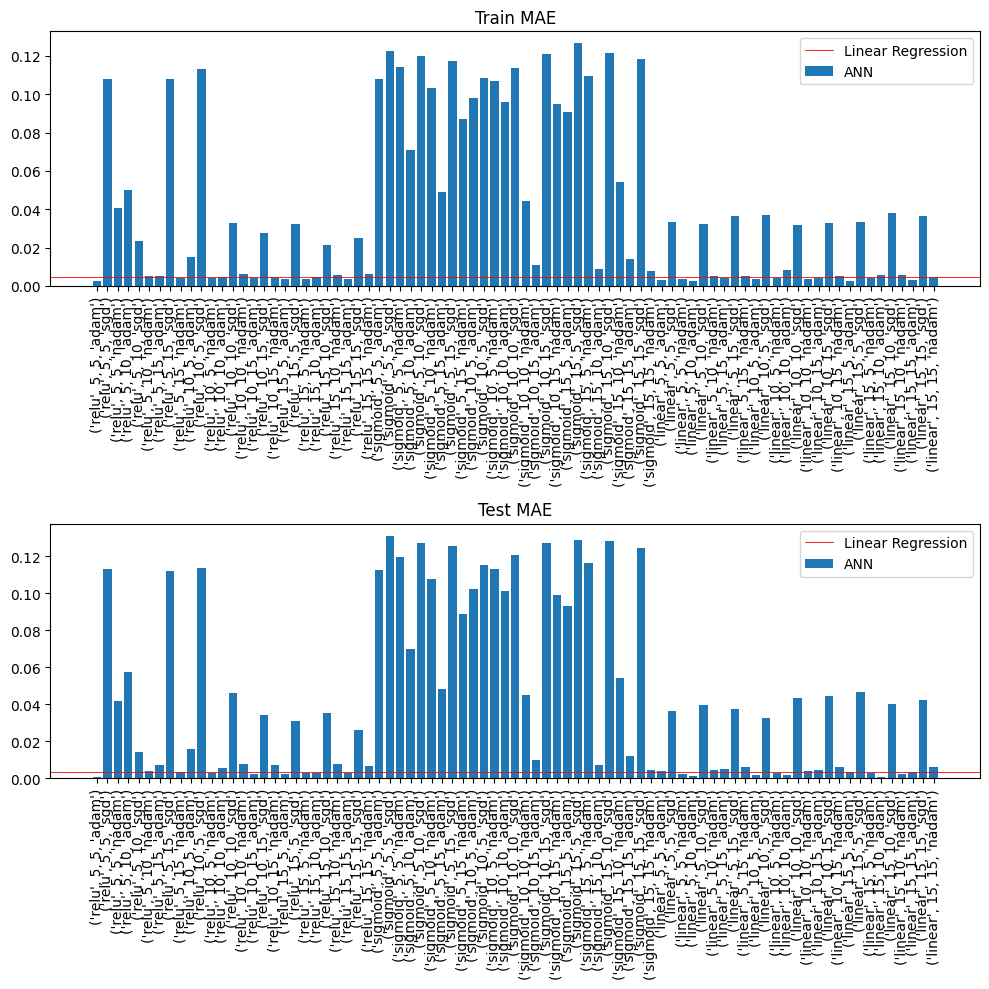

,Combination,Train MAE,Test MAE
76,"('linear', 15, 10, 'adam')",0.005910,0.000997
1,"('relu', 5, 5, 'adam')",0.002363,0.001002
58,"('linear', 5, 10, 'adam')",0.002814,0.001251
67,"('linear', 10, 10, 'adam')",0.008072,0.001952
64,"('linear', 10, 5, 'adam')",0.003639,0.002000
16,"('relu', 10, 15, 'adam')",0.004192,0.002181
78,"('linear', 15, 10, 'nadam')",0.005573,0.002291
57,"('linear', 5, 5, 'nadam')",0.003617,0.002512
19,"('relu', 15, 5, 'adam')",0.003352,0.002527
66,"('linear', 10, 5, 'nadam')",0.004119,0.002873


In [202]:
import itertools
from collections import namedtuple
from sklearn.linear_model import LinearRegression
import pandas as pd
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)

PerformanceMetrics = namedtuple('PerformanceMetrics', ['train_mae', 'test_mae'])

activation_types = ['relu', 'sigmoid', 'linear']
neuron_count_1 = [5,10,15]
neuron_count_2 = [5,10,15]
optimizers = ['adam', 'sgd', 'nadam']

combinations = list(itertools.product(activation_types, neuron_count_1,neuron_count_2, optimizers))

def prescreening(combo,all_data_sets):
    X,y=all_data_sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    activation_type, neuron_count_1, neuron_count_2, optimizer = combo
    
    
    model = Sequential([
        Dense(neuron_count_1, activation=activation_type, input_dim=5),
        Dense(neuron_count_2, activation=activation_type),
        Dense(1, activation='linear')
    ])
    

    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

    # Train and evaluate the model on your dataset here
    history = model.fit(X_train, y_train, epochs =100, validation_split= 0.1)
    
    # Evaluate the model on the test set
    test_metrics = model.evaluate(X_test, y_test)
    
    # Return the performance metrics (e.g., mean absolute error) as the result
    # Access the training and validation MAE from the history object
    train_mae = history.history['mean_absolute_error']
    test_mae = test_metrics[1]
    #test_mae = history.history['val_mean_absolute_error']
    return model,PerformanceMetrics(train_mae, test_mae)

results = {}
models = {}
for combo in combinations:
    #activation_type, neuron_count_1, neuron_count_2, optimizer = combo
    models[combo],results[combo] = prescreening(combo,all_data_sets)
with open("results.pkl","wb") as f:    
    pickle.dump(results,f)
with open("models.pkl","wb") as f:  
    pickle.dump(models,f)
with open("combinations.pkl","wb") as f:      
    pickle.dump(combinations,f)
    



# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# Calculate Mean Absolute Error for Linear Regression
mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)

# Print the MAE for Linear Regression
print(f'Linear Regression - Train MAE: {mae_linear_train}')
print(f'Linear Regression - Test MAE: {mae_linear_test}')


# Initialize a Dataframe with result of Linear Regression
linear_combination = ('linear_regression')
lr_df = pd.DataFrame({
    'Combination': [linear_combination],
    'Train MAE': [mae_linear_train],
    'Test MAE': [mae_linear_test]
})


# Create a list of dictionaries where each dictionary represents a combination
ANN_rs_data = []
for combo in combinations:
    ANN_rs_data.append({
        'Combination': combo,
        'Train MAE': results[combo].train_mae[-1],
        'Test MAE': results[combo].test_mae
    })
  
ann_df = pd.DataFrame(ANN_rs_data)    

train_mae_values = ann_df["Train MAE"]
test_mae_values=ann_df["Test MAE"]


# Concatenate the Linear Regression data to the DataFrame
final_df = pd.concat([lr_df, ann_df], ignore_index=True)
final_df = final_df.sort_values(by='Test MAE', ascending=True)



# Create two subplots to plot results of training and testing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

x = np.arange(len(combinations))

# Create bar chart for ANN results then add result of Linear Regression result as reference
ax1.bar(x, train_mae_values, label='ANN')
ax2.bar(x, test_mae_values, label='ANN')

# Add horizontal line for linear regression 
ax1.axhline(y=mae_linear_train, color='red', linewidth=0.6,linestyle='-', label='Linear Regression')
ax2.axhline(y=mae_linear_test, color='red', linewidth=0.6,linestyle='-', label='Linear Regression')

ax1.set_title('Train MAE')
ax2.set_title('Test MAE')

ax1.set_xticks(x)
ax1.set_xticklabels(combinations, rotation=90)
ax2.set_xticks(x)
ax2.set_xticklabels(combinations, rotation=90)

# Display the legend
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()


# Display the updated DataFrame
# Function to highlight the desired row
def highlight_row(row):
    return ['background-color: yellow' if row['Combination'] == 'linear_regression' else '' for _ in row]

styled_df = final_df.style.apply(highlight_row, axis=1)
display(styled_df)


## explore different number of hidden layers 


In [167]:

combinations = list(
    (
        (2,'linear',5,15,'adam'),
        (2,'relu',5,15,'adam'),
        (3,'linear',5,15,15,'adam'),
        (3,'relu',5,15,15,'adam'),
        (4,'linear',5,15,15,15,'adam'),
        (4,'relu',5,15,15,15,'adam'),
        (5,'linear',5,15,15,15,15,'adam'),
        (5,'relu',5,15,15,15,15,'adam'),
    )
)

def create_and_evaluate_model(
        all_data_sets,
        num_layers,
        activation_type,
        neuron_count_1,
        neuron_count_2,
        neuron_count_3,
        neuron_count_4=None,
        neuron_count_5=None,
        neuron_count_6=None,
        seed_value=None
    ):
    X, y = all_data_sets
    
    if seed_value is not None:
        os.environ['PYTHONHASHSEED']=str(seed_value)
        np.random.seed(seed_value)
        tf.random.set_seed(seed_value)
        rn.seed(seed_value)
        
    if num_layers==3:
        
        model = Sequential([
            Dense(neuron_count_1, activation=activation_type, input_dim=5),
            Dense(neuron_count_2, activation=activation_type),
            Dense(neuron_count_3, activation=activation_type),
            Dense(1, activation='linear')
        ])
    elif num_layers==4:
        model = Sequential([
            Dense(neuron_count_1, activation=activation_type, input_dim=5),
            Dense(neuron_count_2, activation=activation_type),
            Dense(neuron_count_3, activation=activation_type),
            Dense(neuron_count_4, activation=activation_type),
            Dense(1, activation='linear')
        ])
    elif num_layers==5:
        model = Sequential([
            Dense(neuron_count_1, activation=activation_type, input_dim=5),
            Dense(neuron_count_2, activation=activation_type),
            Dense(neuron_count_3, activation=activation_type),
            Dense(neuron_count_4, activation=activation_type),
            Dense(neuron_count_5, activation=activation_type),
            Dense(1, activation='linear')
        ])
    elif num_layers==2:
        model = Sequential([
            Dense(neuron_count_1, activation=activation_type, input_dim=5),
            Dense(neuron_count_2, activation=activation_type),
            Dense(1, activation='linear')
        ])   

    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

    # Train and evaluate the model on your dataset here
    history = model.fit(X, y, epochs = 80, batch_size=64, validation_split= 0.2)
    
    # Return the performance metrics (e.g., mean absolute error) as the result
    train_mae = history.history['mean_absolute_error']
    test_mae = history.history['val_loss']
    
    return model,PerformanceMetrics(train_mae, test_mae)



In [172]:
        
for combo in combinations:
    models[combo],results[combo] = create_and_evaluate_model(
        all_data_sets=all_data_sets,
        num_layers=combo[0],
        activation_type=combo[1],
        neuron_count_1=combo[2],
        neuron_count_2=combo[3],
        neuron_count_3=None if combo[0]<3 else combo[4],
        neuron_count_4=None if combo[0]<4 else combo[5],
        neuron_count_5=None if combo[0]<5 else combo[6],
        seed_value=0
    )


Epoch 1/80
7/7 [==============================] - 1s 23ms/step - loss: 0.4826 - mean_absolute_error: 0.4826 - val_loss: 0.3943 - val_mean_absolute_error: 0.3943
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 0.3656 - mean_absolute_error: 0.3656 - val_loss: 0.3278 - val_mean_absolute_error: 0.3278
Epoch 3/80
7/7 [==============================] - 0s 6ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - val_loss: 0.3023 - val_mean_absolute_error: 0.3023
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - val_loss: 0.2887 - val_mean_absolute_error: 0.2887
Epoch 5/80
7/7 [==============================] - 0s 6ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - val_loss: 0.2668 - val_mean_absolute_error: 0.2668
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - val_loss: 0.2430 - val_mean_absolute_error: 0.2430
Epoch 7/80
7/7 [=======================

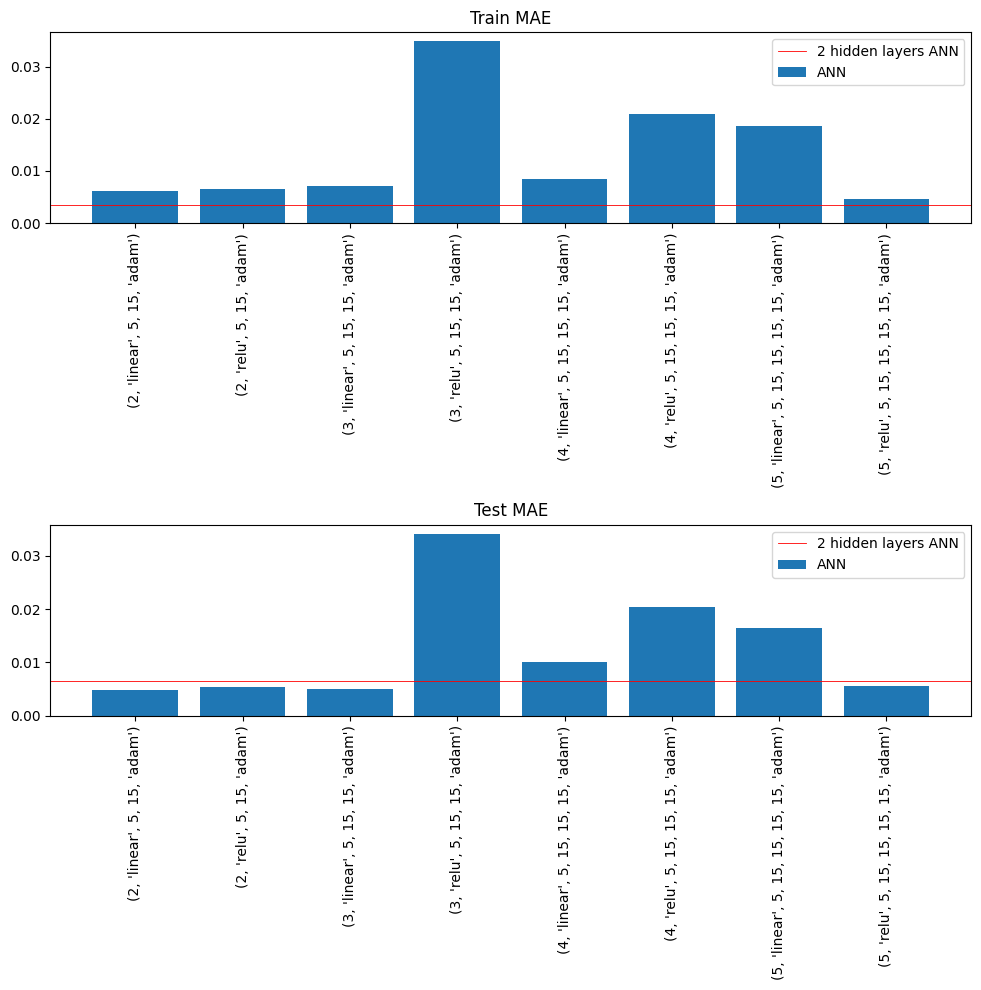

,Combination,Train MAE,Test MAE
0,"(2, 'linear', 5, 15, 'adam')",0.006116,0.004819
2,"(3, 'linear', 5, 15, 15, 'adam')",0.007157,0.004947
1,"(2, 'relu', 5, 15, 'adam')",0.006535,0.005417
7,"(5, 'relu', 5, 15, 15, 15, 15, 'adam')",0.004644,0.005500
4,"(4, 'linear', 5, 15, 15, 15, 'adam')",0.008373,0.010113
6,"(5, 'linear', 5, 15, 15, 15, 15, 'adam')",0.018628,0.016512
5,"(4, 'relu', 5, 15, 15, 15, 'adam')",0.020976,0.020387
3,"(3, 'relu', 5, 15, 15, 'adam')",0.034824,0.034093


In [171]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)


# Create a list of dictionaries where each dictionary represents a combination
ANN_rs_data = []
for combo in combinations:
    ANN_rs_data.append({
        'Combination': combo,
        'Train MAE': results[combo].train_mae[-1],
        'Test MAE': results[combo].test_mae[-1]
    })

ann_df = pd.DataFrame(ANN_rs_data)    

train_mae_values = ann_df["Train MAE"]
test_mae_values=ann_df["Test MAE"]


# Concatenate the Linear Regression data to the DataFrame
final_df = ann_df.copy()
final_df = final_df.sort_values(by='Test MAE', ascending=True)



# Create two subplots to plot results of training and testing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

x = np.arange(len(combinations))

# Create bar chart for ANN results then add result of Linear Regression result as reference
ax1.bar(x, train_mae_values, label='ANN')
ax2.bar(x, test_mae_values, label='ANN')

# Add horizontal line for two hidden layers ANN
ax1.axhline(y=results["best-midterm"].train_mae[-1], color='red', linewidth=0.6,linestyle='-', label='2 hidden layers ANN')
ax2.axhline(y=results["best-midterm"].test_mae[-1], color='red', linewidth=0.6,linestyle='-', label='2 hidden layers ANN')

ax1.set_title('Train MAE')
ax2.set_title('Test MAE')

ax1.set_xticks(x)
ax1.set_xticklabels(combinations, rotation=90)
ax2.set_xticks(x)
ax2.set_xticklabels(combinations, rotation=90)

# Display the legend
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()


# Display the updated DataFrame
# Function to highlight the desired row
def highlight_row(row):
    return ['background-color: yellow' if row['Combination'] == 'linear_regression' else '' for _ in row]

styled_df = final_df.style.apply(highlight_row, axis=1)
display(styled_df)


## Cross Validation 


In [174]:

# Number of options 
num_options = 8

# Number of replication per option
num_replication = 10

# Create a 2D NumPy array initialized with zeros (9 options x 100 num_replication)
measurements = np.zeros((num_options, num_replication))

init_seed=0

for r in range(num_replication):

    i=0 
    for combo in combinations:

        _, rs = create_and_evaluate_model(
                all_data_sets=all_data_sets,
                num_layers=combo[0],
                activation_type=combo[1],
                neuron_count_1=combo[2],
                neuron_count_2=combo[3],
                neuron_count_3=None if combo[0]<3 else combo[4],
                neuron_count_4=None if combo[0]<4 else combo[5],
                neuron_count_5=None if combo[0]<5 else combo[6],
                seed_value=init_seed + r
            )
        
        measurements[i,r] = rs.test_mae[-1]
        i=i+1

    

Epoch 1/80
7/7 [==============================] - 1s 23ms/step - loss: 0.4826 - mean_absolute_error: 0.4826 - val_loss: 0.3943 - val_mean_absolute_error: 0.3943
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 0.3656 - mean_absolute_error: 0.3656 - val_loss: 0.3278 - val_mean_absolute_error: 0.3278
Epoch 3/80
7/7 [==============================] - 0s 6ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - val_loss: 0.3023 - val_mean_absolute_error: 0.3023
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - val_loss: 0.2887 - val_mean_absolute_error: 0.2887
Epoch 5/80
7/7 [==============================] - 0s 6ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - val_loss: 0.2668 - val_mean_absolute_error: 0.2668
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - val_loss: 0.2430 - val_mean_absolute_error: 0.2430
Epoch 7/80
7/7 [=======================

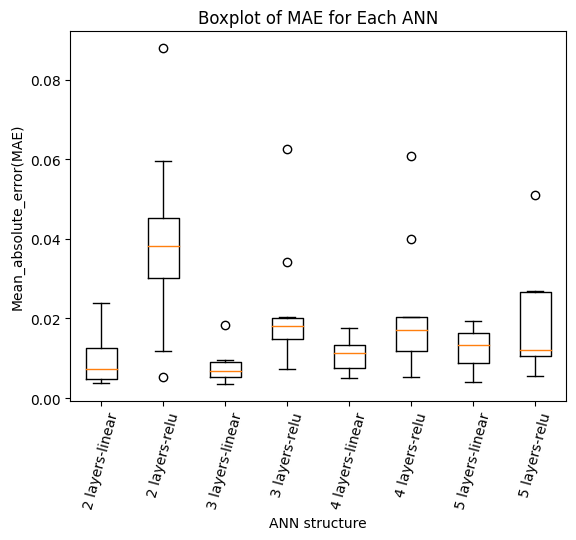

In [176]:
        
mean_values = np.mean(measurements, axis=1)
std_dev_values = np.std(measurements, axis=1)
model_label =[
    '2 layers-linear',
    '2 layers-relu',
    '3 layers-linear',
    '3 layers-relu',
    '4 layers-linear',
    '4 layers-relu',
    '5 layers-linear',
    '5 layers-relu',
]

# Create a boxplot
plt.boxplot(measurements.T,labels=model_label)

# Set plot labels and title
plt.xlabel('ANN structure')
plt.ylabel('Mean_absolute_error(MAE)')
plt.title('Boxplot of MAE for Each ANN')

# Rotate x-axis labels
plt.xticks(rotation=75)  

# Show the plot
plt.show()

In [182]:

cross_v_data ={model_label[i]:v for i,v in enumerate(zip(mean_values,std_dev_values))}
pd.DataFrame(
    [mean_values,std_dev_values],
    columns=model_label,
    index=["mean",'std_dev']
)

,2 layers-linear,2 layers-relu,3 layers-linear,3 layers-relu,4 layers-linear,4 layers-relu,5 layers-linear,5 layers-relu
mean,0.010360,0.039120,0.007703,0.021993,0.011014,0.021542,0.012623,0.018909
std_dev,0.007321,0.022072,0.004066,0.015098,0.004181,0.015800,0.004956,0.013284


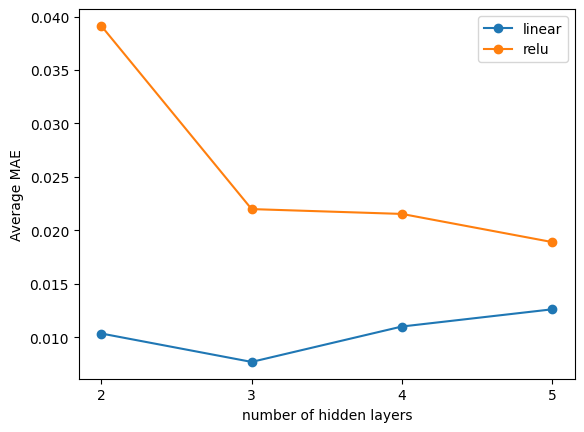

In [189]:
# Observe training results
plt.plot(mean_values[::2], 'o-', label='linear')
plt.plot(mean_values[1::2], 'o-', label='relu')

plt.ylabel('Average MAE')
plt.xlabel('number of hidden layers')
plt.legend(['linear', 'relu'], loc='upper right')
layer_labels = ['2', '3', '4', '5']
plt.xticks(range(len(layer_labels)), layer_labels)
plt.show()

## ANOVA

In [178]:
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Separate the data into mean and standard deviation
means = [value[0] for value in cross_v_data.values()]
std_devs = [value[1] for value in cross_v_data.values()]

# Separate the data into lists for each model
data_lists = [list(values) for values in cross_v_data.values()]


f_statistic, p_value = f_oneway(*data_lists)

# Print ANOVA results
print(f'ANOVA p-value: {p_value:.4f}')

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(np.concatenate([means, std_devs]), np.repeat(list(cross_v_data.keys()), 2))

# Print Tukey's HSD results
print(tukey_results)

ANOVA p-value: 0.0319
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
2 layers-linear   2 layers-relu  -0.0099   0.97  -0.051 0.0312  False
2 layers-linear 3 layers-linear  -0.0085 0.9869 -0.0496 0.0326  False
2 layers-linear   3 layers-relu   -0.009 0.9819 -0.0501 0.0321  False
2 layers-linear 4 layers-linear    -0.01 0.9676 -0.0511  0.031  False
2 layers-linear   4 layers-relu  -0.0152  0.809 -0.0562 0.0259  False
2 layers-linear 5 layers-linear  -0.0147 0.8267 -0.0558 0.0263  False
2 layers-linear   5 layers-relu  -0.0156 0.7881 -0.0567 0.0255  False
  2 layers-relu 3 layers-linear   0.0014    1.0 -0.0397 0.0425  False
  2 layers-relu   3 layers-relu   0.0009    1.0 -0.0402  0.042  False
  2 layers-relu 4 layers-linear  -0.0002    1.0 -0.0412 0.0409  False
  2 layers-relu   4 layers-relu  -0.0053 0.9992 -0.0464 0.0358  Fals

## Best ANN model

In [195]:
# best_ann = models[('linear', 5, 15, 'adam')]
# best_pred = best_ann.predict(X_test)
# best_mae = mean_absolute_error(y_test, best_pred)

best = (3,'linear',5,15,15,'adam')
init_seed=0

best_model, rs = create_and_evaluate_model(
        all_data_sets=all_data_sets,
        num_layers=combo[0],
        activation_type=combo[1],
        neuron_count_1=combo[2],
        neuron_count_2=combo[3],
        neuron_count_3=None if combo[0]<3 else combo[4],
        neuron_count_4=None if combo[0]<4 else combo[5],
        neuron_count_5=None if combo[0]<5 else combo[6],
        seed_value=init_seed
    )




Epoch 1/80
7/7 [==============================] - 1s 26ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - val_loss: 0.4378 - val_mean_absolute_error: 0.4378
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 0.4301 - mean_absolute_error: 0.4301 - val_loss: 0.3929 - val_mean_absolute_error: 0.3929
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.3791 - mean_absolute_error: 0.3791 - val_loss: 0.3348 - val_mean_absolute_error: 0.3348
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - val_loss: 0.2657 - val_mean_absolute_error: 0.2657
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - val_loss: 0.1915 - val_mean_absolute_error: 0.1915
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - val_loss: 0.1532 - val_mean_absolute_error: 0.1532
Epoch 7/80
7/7 [=======================

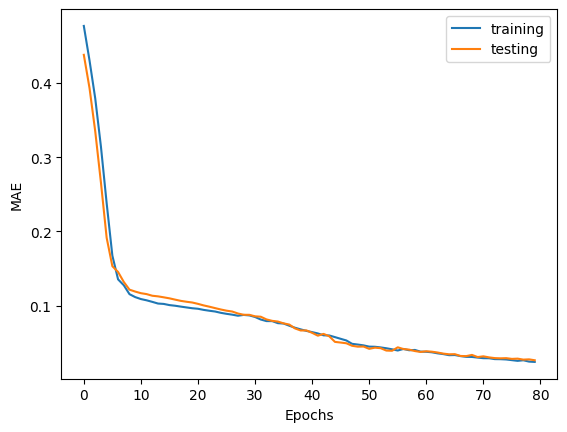

In [197]:
# Observe training results
plt.plot(rs.train_mae)
plt.plot(rs.test_mae)

plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['training', 'testing'], loc='upper right')
plt.show()

In [198]:
print(f"best model MAE: {rs.test_mae[-1]}")

best model MAE: 0.02657359652221203
